# Proceso de analisis de componentes principales

In [3]:
library(ggplot2)
library(RStoolbox)
library(reshape2)
library(sp)
library(raster)
library(terra)

In [4]:
# Cambiar directorio
setwd(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Satelite\Sentinel2)")

In [5]:
# Crear lista del directorio
lista_datos <- list.files(path = getwd(), pattern = '.*tif$')
lista_datos

[1] "PUCALLPA_S2_20211022T151709_RS.tif"

In [6]:
# Agregar raster multibandas
Sent2 <- stack(lista_datos[1])

Warning message:
"[minmax] min and max values not available for all layers. See 'setMinMax' or 'global'"


In [7]:
# Determinar longitud texto sin formato - NUMERO
Numero = nchar(lista_datos[1]) -4
Numero

[1] 30

In [8]:
# Extraer el string sin formato
nombre = substr(lista_datos[1],0, Numero)
nombre

[1] "PUCALLPA_S2_20211022T151709_RS"

In [9]:
names(Sent2)

[1] "PUCALLPA_S2_20211022T151709_RS_1"  "PUCALLPA_S2_20211022T151709_RS_2" 
 [3] "PUCALLPA_S2_20211022T151709_RS_3"  "PUCALLPA_S2_20211022T151709_RS_4" 
 [5] "PUCALLPA_S2_20211022T151709_RS_5"  "PUCALLPA_S2_20211022T151709_RS_6" 
 [7] "PUCALLPA_S2_20211022T151709_RS_7"  "PUCALLPA_S2_20211022T151709_RS_8" 
 [9] "PUCALLPA_S2_20211022T151709_RS_9"  "PUCALLPA_S2_20211022T151709_RS_10"
[11] "PUCALLPA_S2_20211022T151709_RS_11"

In [10]:
name_tif = c("B1","B2","B3","B4","B5","B6","B7","B8","B9","B11","B12")

In [11]:
names(Sent2) = name_tif

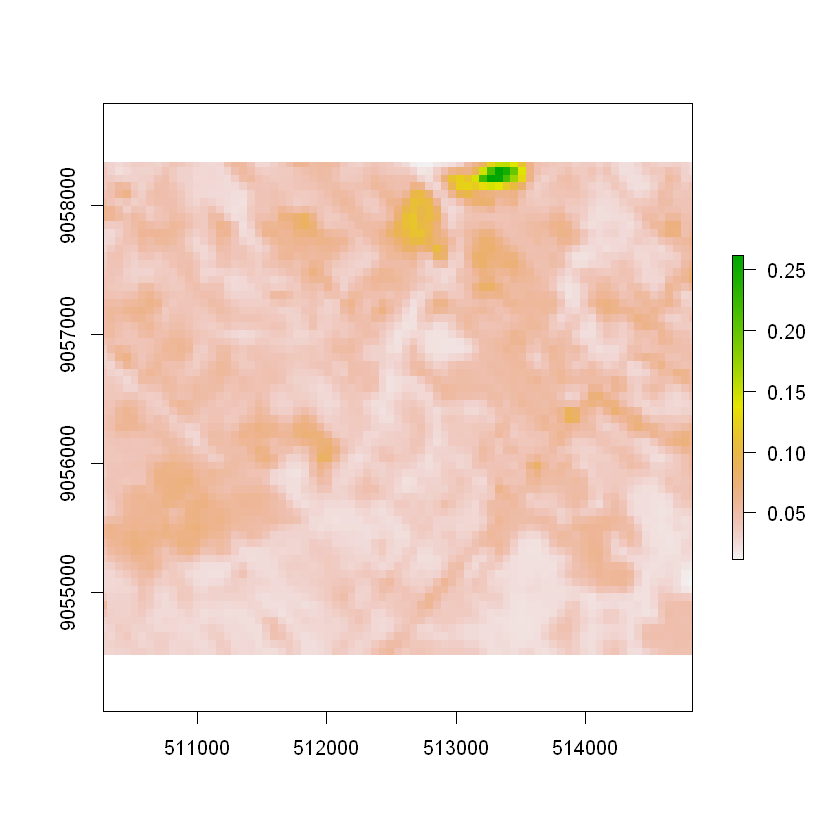

In [12]:
plot(Sent2[[1]])

In [13]:
carpeta = paste(getwd(),"/","Bandas",sep = "")
carpeta

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas"

In [14]:
suppressWarnings(dir.create(carpeta))

In [15]:
# Convertir las bandas a data.frame
dtf <- as.data.frame(Sent2)
names(dtf) <- c("B1","B2","B3","B4","B5","B6","B7","B8","B9","B11","B12")

In [16]:
# Eliminar valor NA
dtf1 = dtf[!is.na(dtf$B1),]

In [17]:
# Calculo de componentes principales
acp <- prcomp(dtf1, scale = T)
acp_info <- summary(acp)

In [18]:
fviz_pca_var(acp, col.var ="contrib")

ERROR: Error in fviz_pca_var(acp, col.var = "contrib"): no se pudo encontrar la función "fviz_pca_var"


In [19]:
# Convertir a dataframe
acp_frame <- t(as.data.frame(acp_info$importance))

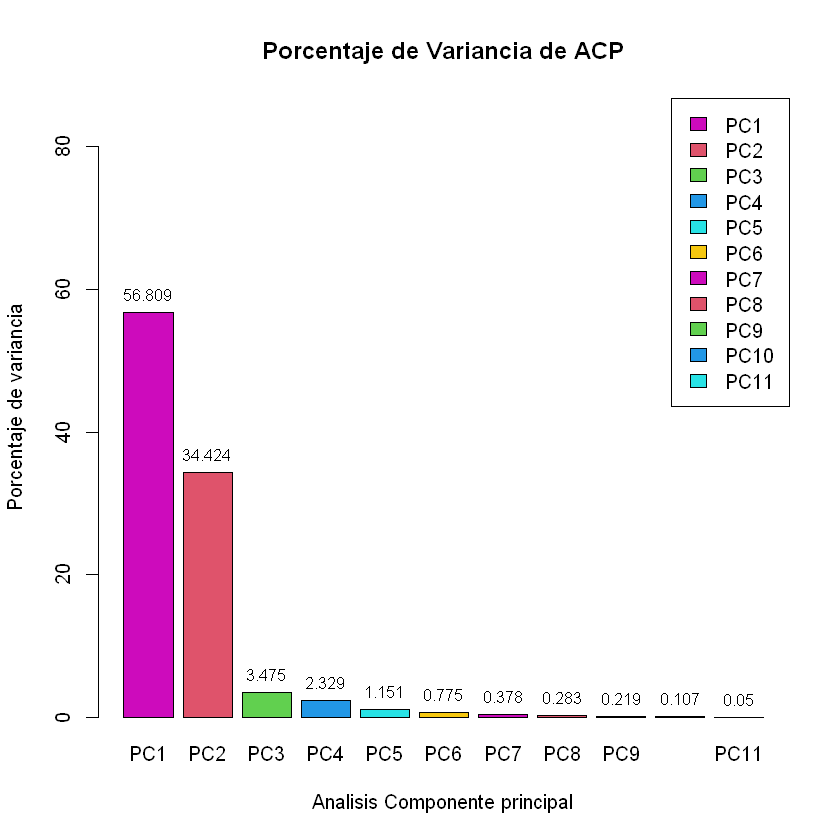

In [20]:
# Generar grafico Barra
barra <- barplot(acp_frame[,2]*100,
                 names.arg = rownames(acp_frame),
                 col = c(6,2,3,4,5,7),
                 legend.text = rownames(acp_frame),
                 args.legend = list(x = "topright"),
                 xlab = "Analisis Componente principal", 
                 ylab = "Porcentaje de variancia",
                 main = "Porcentaje de Variancia de ACP",
                 ylim=c(0, max(acp_frame[,2]*100)+30))

text(x=barra, y=acp_frame[,2]*100, pos=3, cex=0.8,
     label=round(acp_frame[,2]*100, 3))

In [21]:
## Run PCA
set.seed(25)

In [22]:
rpc <- rasterPCA(Sent2,nComp = 11)
rpc

$call
rasterPCA(img = Sent2, nComp = 11)

$model
Call:
princomp(cor = spca, covmat = covMat)

Standard deviations:
     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
0.130591359 0.102515378 0.025851170 0.021513022 0.015849410 0.011962991 
     Comp.7      Comp.8      Comp.9     Comp.10     Comp.11 
0.009599980 0.008648321 0.005160119 0.003941420 0.002504444 

 11  variables and  174648 observations.

$map
class       : SpatRaster 
dimensions  : 383, 456, 11  (nrow, ncol, nlyr)
resolution  : 10, 10  (x, y)
extent      : 510270, 514830, 9054520, 9058350  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +south +datum=WGS84 +units=m +no_defs 
source(s)   : memory
varname     : PUCALLPA_S2_20211022T151709_RS 
names       :        PC1,        PC2,         PC3,        PC4,         PC5,        PC6, ... 
min values  : -0.3018841, -0.5370163, -0.09439343, -0.1448012, -0.09129176, -0.1825338, ... 
max values  :  0.2946639,  0.6903810,  0.39596930,  0.1974324,  0.078

In [23]:
names(rpc)

[1] "call"  "model" "map"

In [24]:
## Model parameters:
summary(rpc$model)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     0.1305914 0.1025154 0.02585117 0.02151302 0.015849410
Proportion of Variance 0.5819658 0.3586300 0.02280494 0.01579325 0.008572249
Cumulative Proportion  0.5819658 0.9405959 0.96340080 0.97919405 0.987766298
                            Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.011962991 0.009599980 0.008648321 0.005160119
Proportion of Variance 0.004883691 0.003144918 0.002552303 0.000908632
Cumulative Proportion  0.992649989 0.995794907 0.998347210 0.999255842
                            Comp.10      Comp.11
Standard deviation     0.0039414200 0.0025044441
Proportion of Variance 0.0005301198 0.0002140382
Cumulative Proportion  0.9997859618 1.0000000000

In [25]:
loadings(rpc$model)


Loadings:
    Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
B1                 0.175         0.162         0.839  0.193  0.357  0.231 
B2   0.114  0.131  0.359               -0.144  0.284 -0.254 -0.390 -0.369 
B3          0.178  0.404               -0.138               -0.437 -0.128 
B4   0.220  0.234  0.460  0.122 -0.171 -0.156 -0.295 -0.421  0.446  0.383 
B5   0.126  0.275  0.300        -0.372  0.195 -0.169  0.688  0.178 -0.307 
B6  -0.274  0.312  0.123 -0.177         0.447               -0.436  0.596 
B7  -0.399  0.341        -0.233  0.116  0.446        -0.377  0.318 -0.444 
B8  -0.390  0.348        -0.455        -0.694         0.167               
B9  -0.365  0.334 -0.116  0.804  0.261 -0.117         0.101               
B11  0.351  0.494 -0.580        -0.459         0.202 -0.191               
B12  0.515  0.352        -0.180  0.708        -0.220  0.133               
    Comp.11
B1         
B2  -0.613 
B3   0.742 
B4         
B5  -0.107 
B6  -0.164 
B7   

In [26]:
banda_ACP = stack(rpc$map)

In [27]:
banda_ACP[[2]]

class      : RasterLayer 
dimensions : 383, 456, 174648  (nrow, ncol, ncell)
resolution : 10, 10  (x, y)
extent     : 510270, 514830, 9054520, 9058350  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=18 +south +datum=WGS84 +units=m +no_defs 
source     : memory
names      : PC2 
values     : -0.5370163, 0.690381  (min, max)


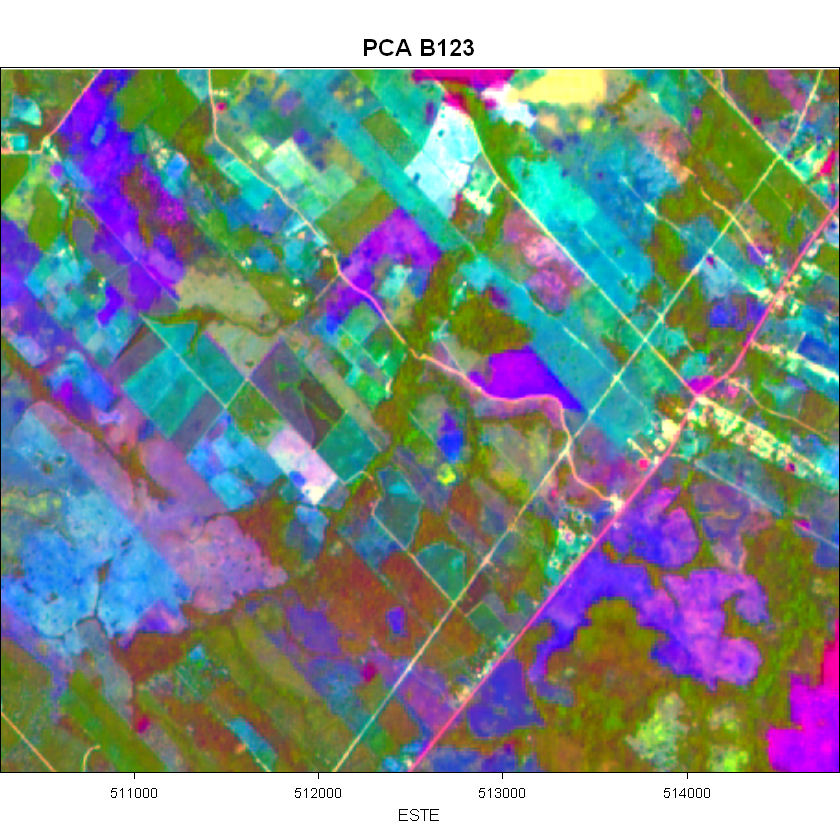

In [28]:
# Visualizacion
plotRGB(rpc$map,3,2,1, stretch = "lin", main = "PCA B123", axe = T,  xlab="ESTE", ylab="NORTE")

In [29]:
# Crear un for Clima
for (i in 1:3){
    # Mantiene el nombre de archivo original
    banda <- banda_ACP[[i]]
    name_tif <- paste(carpeta,"/S2_", i+50,"_","_ACP_", i,".tif",sep='')
    # Exportar 
    writeRaster(banda, name_tif, drivername="Gtiff",overwrite=TRUE)
    # Imprimir
    print(paste("Proceso terminado ",name_tif))
}

[1] "Proceso terminado  C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/S2_51__ACP_1.tif"
[1] "Proceso terminado  C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/S2_52__ACP_2.tif"
[1] "Proceso terminado  C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/S2_53__ACP_3.tif"
